<a href="https://colab.research.google.com/github/josevanito/data-sciencie/blob/main/lisboa_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [ ]:
df = pd.read_csv("http://data.insideairbnb.com/portugal/lisbon/lisbon/2021-10-15/visualisations/listings.csv")

##LISBOA##
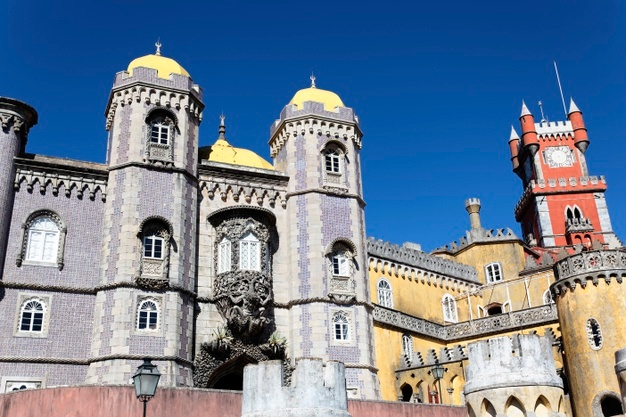

## **LISBOA**
A capital portuguesa é destino de muitos imigrantes brasileiros que escolhem o país para viver. Além de viver em uma capital cosmopolita, bela, cultural e agitada, morar em Lisboa também é sinônimo de um alto custo de vida, especialmente se comparado a outras regiões do país.
  Lisboa é uma cidade agradável, com uma vida noturna bem agitada. Definitivamente é um destino cosmopolita com pessoas do mundo inteiro e atrativos culturais variados, seja de museus, teatros, casas noturnas ou shows.

## Análise de Dados
#Dicionário das variaveis


* id - número de id gerado para identificar o imóvel
*   name - nome da propriedade anunciada
*  host_id - número de id do proprietário (anfitrião) da propriedade 
*   neighbourhood_group - esta coluna não contém nenhum valor válido
*   neighbourhood - nome do bairro
*  price - preço para alugar o imóvel
*  minimum_nights - quantidade mínima de noites para reservar 
*   latitude - coordenada da latitude da propriedade



Aqui estão as 5 primeiras entradas dos dados coletados atraveis do site *Airbnb.*

In [ ]:
df.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm,license
0,6499,Belém 1 Bedroom Historical Apartment,14455,Bruno,Lisboa,Belm,38.69750,-9.19768,Entire home/apt,40,3,30,2021-09-18,0.35,1,161,4,NaN
1,25659,Heart of Alfama Lisbon Center - Cœur de l'Alfama,107347,Ellie,Lisboa,Santa Maria Maior,38.71241,-9.12706,Entire home/apt,45,2,122,2019-11-08,1.35,1,296,9,56539/AL.
2,29248,Apartamento Alfama com vista para o rio!,125768,Bárbara,Lisboa,Santa Maria Maior,38.71082,-9.12719,Entire home/apt,54,3,333,2019-10-29,2.73,1,170,10,23535/AL
3,29396,Alfama Hill - Boutique apartment,126415,Mónica,Lisboa,Santa Maria Maior,38.71156,-9.12987,Entire home/apt,51,2,290,2021-10-01,2.81,1,299,34,28737/AL
4,29720,TheHOUSE - Your luxury home,128075,Francisco,Lisboa,Estrela,38.71108,-9.15979,Entire home/apt,1114,2,59,2021-09-04,0.86,1,323,4,55695/AL


Este dataset que baixamos é a versão "resumida" do Airbn,onde temos 18761 entradas e 18 variáveis.


In [ ]:
print("Entradas:\t {}".format(df.shape[0]))
print("Variáveis:\t {}\n".format(df.shape[1]))
display(df.dtypes)

Entradas:	 18761
Variáveis:	 18



id                                  int64
name                               object
host_id                             int64
host_name                          object
neighbourhood_group                object
neighbourhood                      object
latitude                          float64
longitude                         float64
room_type                          object
price                               int64
minimum_nights                      int64
number_of_reviews                   int64
last_review                        object
reviews_per_month                 float64
calculated_host_listings_count      int64
availability_365                    int64
number_of_reviews_ltm               int64
license                            object
dtype: object

## *`segue abaixo dados representados pelos histogramas;`*

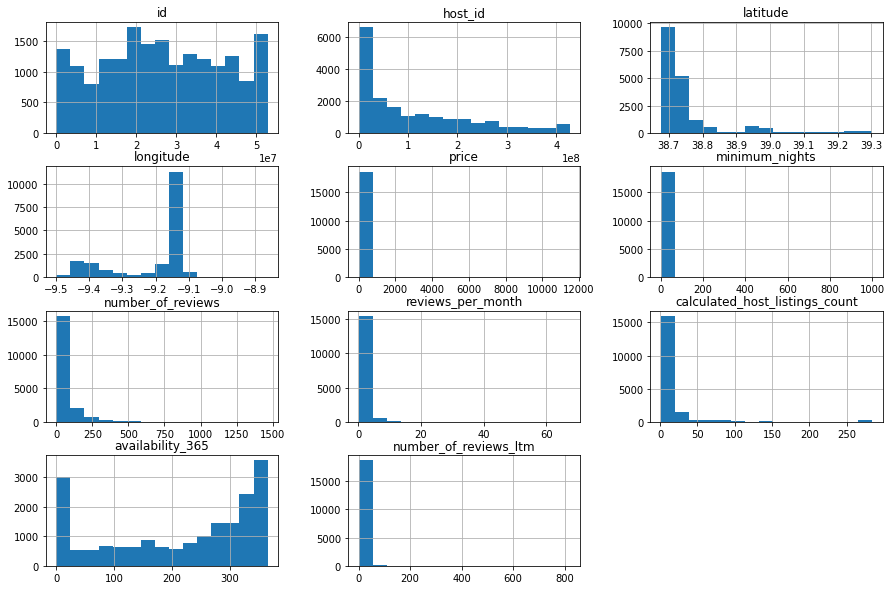

In [ ]:
df.hist(bins=15, figsize=(15,10));

In [ ]:
(df.isnull().sum() / df.shape[0]).sort_values(ascending=False)

reviews_per_month                 0.146474
last_review                       0.146474
license                           0.099035
host_name                         0.000906
name                              0.000426
longitude                         0.000000
host_id                           0.000000
neighbourhood_group               0.000000
neighbourhood                     0.000000
latitude                          0.000000
room_type                         0.000000
number_of_reviews_ltm             0.000000
price                             0.000000
minimum_nights                    0.000000
number_of_reviews                 0.000000
calculated_host_listings_count    0.000000
availability_365                  0.000000
id                                0.000000
dtype: float64

In [ ]:
df.median()

id                                2.597212e+07
host_id                           6.731857e+07
latitude                          3.871747e+01
longitude                        -9.147070e+00
price                             7.400000e+01
minimum_nights                    2.000000e+00
number_of_reviews                 1.500000e+01
reviews_per_month                 8.900000e-01
calculated_host_listings_count    4.000000e+00
availability_365                  2.570000e+02
number_of_reviews_ltm             1.000000e+00
dtype: float64

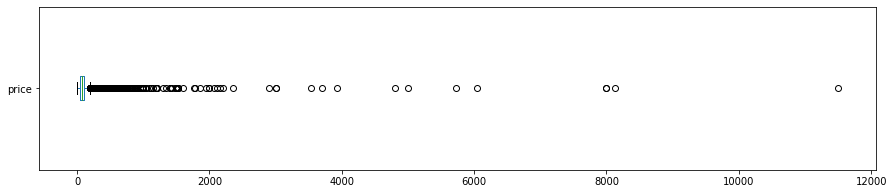

In [ ]:
df.price.plot(kind='box', vert=False, figsize=(15, 3),)
plt.show()

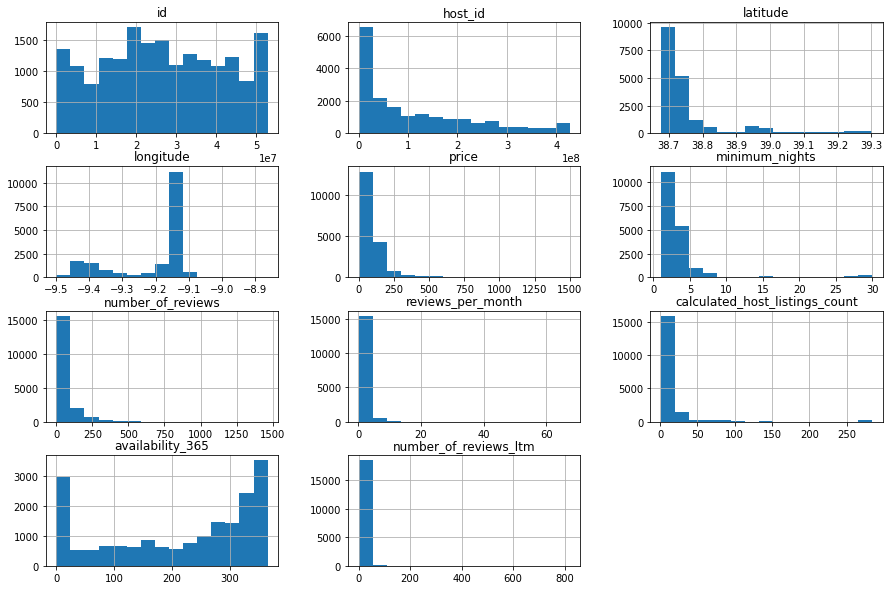

In [ ]:
df_clean = df.copy()
df_clean.drop(df_clean[df_clean.price > 1500].index, axis=0, inplace=True)
df_clean.drop(df_clean[df_clean.minimum_nights > 30].index, axis=0, inplace=True)


df_clean.drop('neighbourhood_group', axis=1, inplace=True)


df_clean.hist(bins=15, figsize=(15,10));

In [ ]:
corr = df_clean[['price', 'minimum_nights', 'number_of_reviews', 'reviews_per_month',
    'calculated_host_listings_count', 'availability_365']].corr()

corr = df_clean[['price', 'minimum_nights', 'number_of_reviews', 'reviews_per_month',
    'calculated_host_listings_count', 'availability_365']].corr()

display(corr)

,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
price,1.000000,-0.035765,-0.110890,-0.093466,0.019384,0.080886
minimum_nights,-0.035765,1.000000,-0.077792,-0.109854,-0.046658,-0.063051
number_of_reviews,-0.110890,-0.077792,1.000000,0.585850,-0.089849,-0.029461
reviews_per_month,-0.093466,-0.109854,0.585850,1.000000,-0.042455,0.035488
calculated_host_listings_count,0.019384,-0.046658,-0.089849,-0.042455,1.000000,0.051700
availability_365,0.080886,-0.063051,-0.029461,0.035488,0.051700,1.000000


In [ ]:
df_clean.room_type.value_counts()

Entire home/apt    14083
Private room        3916
Hotel room           332
Shared room          276
Name: room_type, dtype: int64

In [ ]:
df_clean.groupby(['neighbourhood']).price.mean().sort_values(ascending=False)[:10]

neighbourhood
Alguber                                            650.000000
Aveiras de Baixo                                   450.000000
Ota                                                375.000000
Cardosas                                           287.000000
Freiria                                            279.500000
Bucelas                                            236.200000
Vale do Paraso                                     209.000000
Vermelha                                           205.000000
Enxara do Bispo, Gradil e Vila Franca do Rosrio    197.823529
Santa Brbara                                       172.083333
Name: price, dtype: float64

## ***aqui estão alguns lugares mais caros em LISBOA*** #

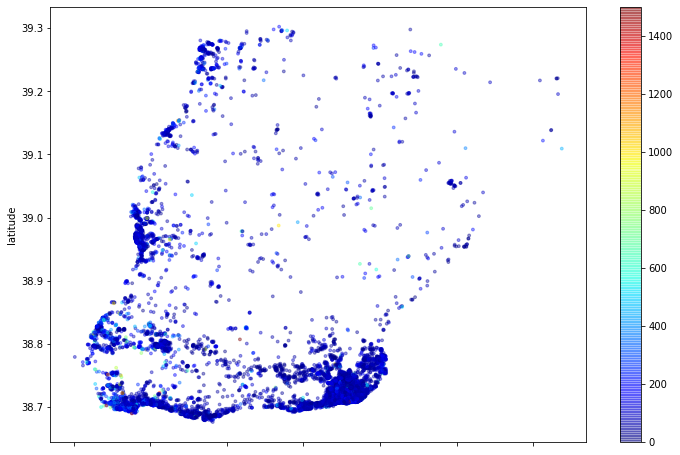

In [ ]:
df_clean.plot(kind="scatter", x='longitude', y='latitude', alpha=0.4, c=df_clean['price'], s=8,
              cmap=plt.get_cmap('jet'), figsize=(12,8));

In [ ]:
df.minimum_nights

0        3
1        2
2        3
3        2
4        2
        ..
18756    1
18757    4
18758    3
18759    3
18760    3
Name: minimum_nights, Length: 18761, dtype: int64

# ***`conclusão`***
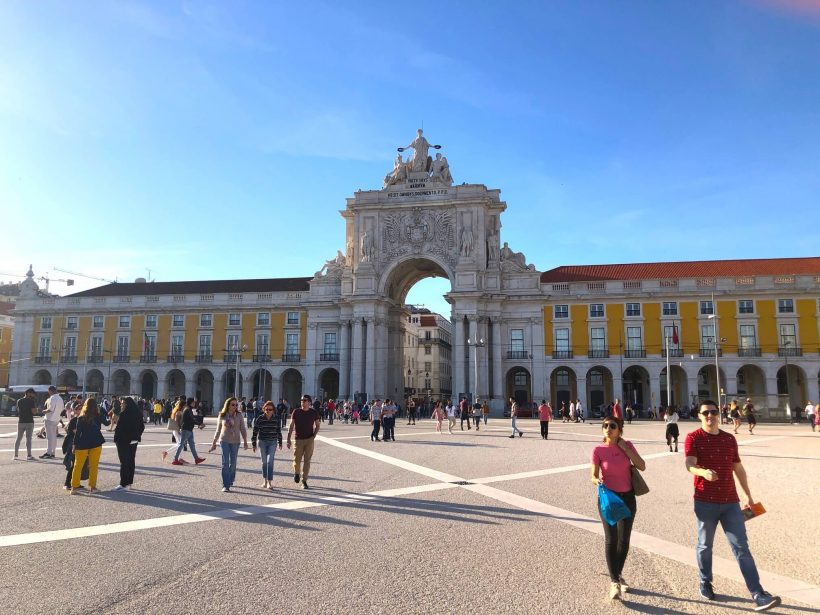

## ***conclusão
Morar em Lisboa pode ser muito vantajoso para quem está buscando oportunidades de trabalho, pois sendo a capital de Portugal, é uma cidade onde grandes empresas nacionais e multinacionais mantém seus escritórios e fábricas, por isso dispõe de ofertas de emprego variadas
  